In [106]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [107]:
dataset = sns.load_dataset('titanic')
dataset.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [108]:
dataset = dataset[['survived', 'pclass', 'sex', 'age']]
dataset.dropna(axis=0, inplace=True)
dataset.head()

,survived,pclass,sex,age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


In [109]:
dataset.shape


(714, 4)

In [110]:
dataset.groupby(['sex', 'survived']).mean()

pclass        age
sex    survived                     
female 0         2.812500  25.046875
       1         1.822335  28.847716
male   0         2.427778  31.618056
       1         1.978495  27.276022

<AxesSubplot:xlabel='sex', ylabel='Count'>

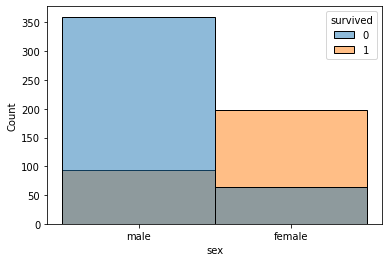

In [111]:
sns.histplot(x='sex', hue='survived', data=dataset)

In [112]:
dataset['sex'].replace({'female': 1, 'male': 0}, inplace=True)

<AxesSubplot:>

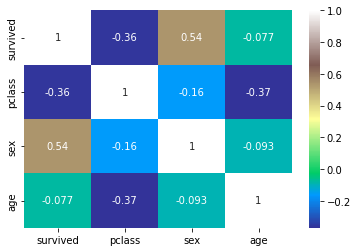

In [113]:
sns.heatmap(dataset.corr(), cmap='terrain', annot=True)

In [114]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.metrics import confusion_matrix

In [115]:
y = dataset['survived']
X = dataset.drop('survived', axis=1)

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [117]:
model = KNeighborsClassifier()

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7552447552447552

In [118]:
cross_val_score(model, X_train, y_train, cv=5).mean()

0.7460259344012206

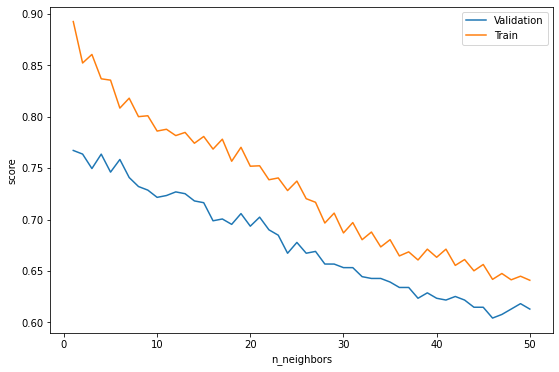

In [119]:
param_vals = np.arange(1, 51)

train_score, val_score = validation_curve(model, X_train, y_train, param_name='n_neighbors', param_range=param_vals, cv=5)

plt.figure(figsize=(9, 6))
plt.plot(param_vals, val_score.mean(axis=1), label='Validation')
plt.plot(param_vals, train_score.mean(axis=1), label='Train')
plt.xlabel('n_neighbors')
plt.ylabel('score')
plt.legend()
plt.show()

In [120]:
parameters = {'n_neighbors': np.arange(1, 31),
              'metric' : ['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
              }

grid = GridSearchCV(KNeighborsClassifier(), parameters, cv=5)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
                         'weights': ['uniform', 'distance']})

In [121]:
grid.best_score_

0.7933180778032036

In [122]:
grid.best_params_

{'algorithm': 'brute',
 'metric': 'manhattan',
 'n_neighbors': 5,
 'weights': 'distance'}

In [123]:
model = grid.best_estimator_

In [124]:
model.score(X_test, y_test)

0.7692307692307693

In [125]:
confusion_matrix(y_test, model.predict(X_test))

array([[76, 11],
       [22, 34]])

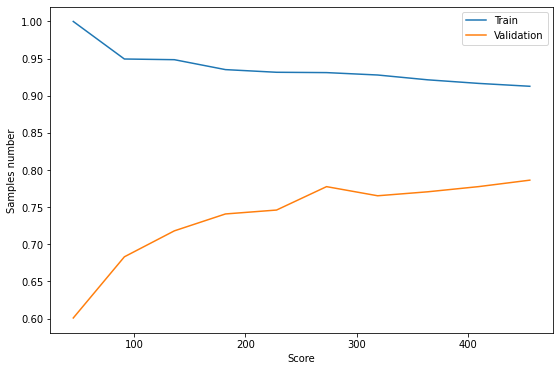

In [126]:
data_size, train_score, val_score = learning_curve(model, X_train, y_train, train_sizes=np.linspace(0.1, 1, 10), cv=5)

plt.figure(figsize=(9, 6))
plt.plot(data_size, train_score.mean(axis=1), label='Train')
plt.plot(data_size, val_score.mean(axis=1), label='Validation')
plt.xlabel('Score')
plt.ylabel('Samples number')
plt.legend()
plt.show()